In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",error_bad_lines=False)

In [0]:
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.56,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [0]:
data.shape

(19918, 32)

In [0]:
data.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14631
new_tests                          15219
total_tests_per_thousand           14631
new_tests_per_thousand             15219
new_tests_smoothed                 14133
new_tests_smoothed_per_thousand    14133
tests_units                        13534
stringency_index                    4365
population                            64
population_density                   874
median_age                          1791
aged_65_older                       2034
aged_70_older                       1882
gdp_per_capita  

In [0]:
india=data[data["location"]=="India"]

In [0]:
india.shape

(147, 32)

In [0]:
india.isna().any()

iso_code                           False
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million            False
new_cases_per_million              False
total_deaths_per_million           False
new_deaths_per_million             False
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                         False
population_density                 False
median_age                         False
aged_65_older                      False
aged_70_older                      False
gdp_per_capita  

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt

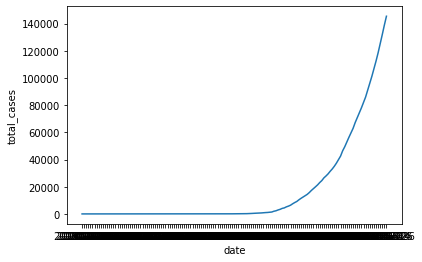

In [0]:
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [0]:
last_5=india.tail()

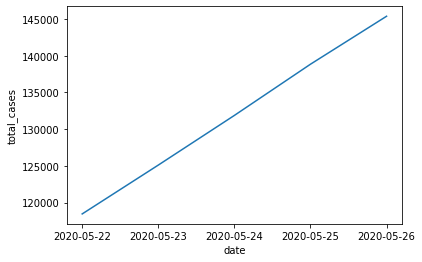

In [0]:
sns.lineplot(x="date",y="total_cases",data=last_5)
plt.show()

In [0]:
china=data[data['location']=="China"]

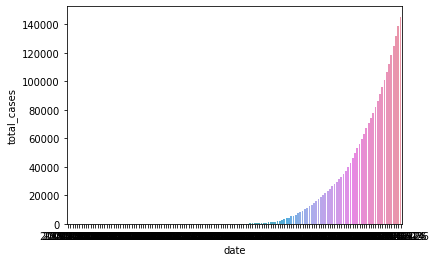

In [0]:
sns.barplot(x="date",y="total_cases",data=india)
plt.show()

In [0]:
india.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8702,IND,India,2020-05-22,118447,6088,3583,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8703,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8704,IND,India,2020-05-24,131868,6767,3867,147,95.556,4.904,2.802,0.107,2943421.0,108623.0,2.133,0.079,102254.0,0.074,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8705,IND,India,2020-05-25,138845,6977,4021,154,100.612,5.056,2.914,0.112,3033591.0,90170.0,2.198,0.065,104400.0,0.076,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8706,IND,India,2020-05-26,145380,6535,4167,146,105.347,4.735,3.020,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import datetime as dt

In [0]:
india['date']=pd.to_datetime(india['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
india['date']=india['date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
india.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8702,IND,India,737567,118447,6088,3583,148,85.831,4.412,2.596,0.107,2719434.0,103514.0,1.971,0.075,97069.0,0.070,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8703,IND,India,737568,125101,6654,3720,137,90.653,4.822,2.696,0.099,2834798.0,115364.0,2.054,0.084,100074.0,0.073,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8704,IND,India,737569,131868,6767,3867,147,95.556,4.904,2.802,0.107,2943421.0,108623.0,2.133,0.079,102254.0,0.074,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8705,IND,India,737570,138845,6977,4021,154,100.612,5.056,2.914,0.112,3033591.0,90170.0,2.198,0.065,104400.0,0.076,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8706,IND,India,737571,145380,6535,4167,146,105.347,4.735,3.020,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [0]:
x=india['date']
y=india['total_cases']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=3)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model=LinearRegression()

In [0]:
model.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred=model.predict(np.array(x_test).reshape(-1,1))

In [0]:
pred

array([[ 1436.57362455],
       [42539.66617715],
       [27900.2085557 ]])

In [0]:
np.array(y_test).reshape(-1,1)

array([[    3],
       [27892],
       [ 1397]])

In [0]:
from sklearn.metrics import mean_squared_error  

In [0]:
mean_squared_error(x_test,pred)

509442182720.81866

In [0]:
model.predict(np.array([[737575]]))

array([[61120.51623517]])